In [45]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller 
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
df = pd.read_csv('Time Series Data.csv')

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [4]:
df.columns = ['month','sales']

In [5]:
df.head()

,month,sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [7]:
df.shape

(105, 2)

In [8]:
df['month'] = pd.to_datetime(df['month'])

In [9]:
df.dtypes

month    datetime64[ns]
sales             int64
dtype: object

In [10]:
df.set_index('month',inplace=True)

In [11]:
df.head()

,sales
month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


<AxesSubplot:xlabel='month'>

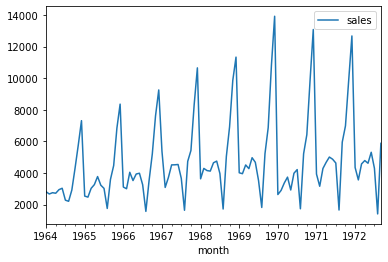

In [12]:
df.plot()

#  poa 
1 the time series is not stationary
2 we observe seasonality twice.
    a. it falls in the mid ofthe year 
    b. it rises towards the end of year
3 we see that there is auto-correlation in the data 


In [13]:
#   two find and validate if the data is non-stationary we run  AD-Fuller test 

In [15]:
ad1 = adfuller(df['sales'])

In [16]:
ad1

(-1.8335930563276228,
 0.363915771660245,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [17]:
# 1 st value is adf test statistics *
# 2nd value is p value
# 3rd value is number of lags
# 4th value is number of records without lags

# Hypotheisis of adfuller test 
#1 null hypo- the data is non-stationary
#2 alternative- hypo the data is stationary


In [18]:
# in the above test run we can see that the p-value is greater than 0.05 and hence accepting the  null hypotheisis

In [19]:
# in order to make data stationary  taking first order difference 

In [20]:
df['first_difference'] = df['sales'].shift(1)-df['sales']

In [22]:
df.head(10)

,sales,first_difference
month,,
1964-01-01,2815,NaN
1964-02-01,2672,143.0
1964-03-01,2755,-83.0
1964-04-01,2721,34.0
1964-05-01,2946,-225.0
1964-06-01,3036,-90.0
1964-07-01,2282,754.0
1964-08-01,2212,70.0
1964-09-01,2922,-710.0


<AxesSubplot:xlabel='month'>

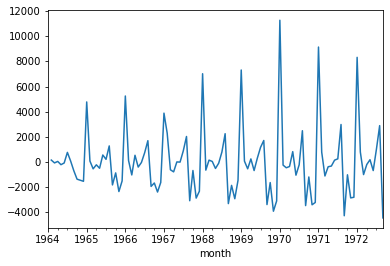

In [24]:
df['first_difference'].plot()

In [25]:
ad2 =adfuller(df['first_difference'].dropna())

In [26]:
ad2

(-7.189896448051034,
 2.519620447386594e-10,
 11,
 92,
 {'1%': -3.503514579651927,
  '5%': -2.893507960466837,
  '10%': -2.583823615311909},
 1466.8267262915888)

In [27]:
#  here we see that the p value is less than 0.05  hence acepting the alternate hypothesis

In [28]:
# estimation of p ,q, d of the model 
# p stands for the order of the ar model example -ar1, ar2 , ar3  etc 
# q stands for moving average example - ma1 ,ma2 , ma3 etc
# d stands for order of differntiation  ex - 1st order , 2nd order  etc

In [29]:
# in order to find out the above values we use acf (auto-corell function), p-acf is here (partial auto correl function)

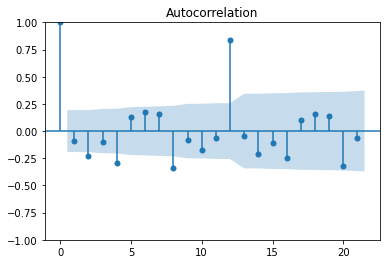

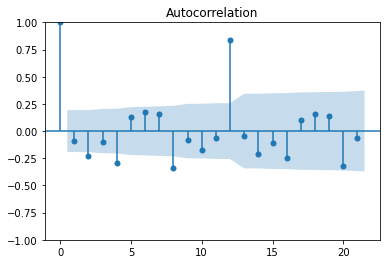

In [31]:
plot_acf(df['first_difference'].dropna())

In [32]:
#  we consider acf plot as the best identification method to find out the q-value

C:\Users\Device Computer\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


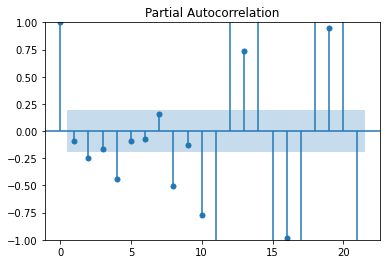

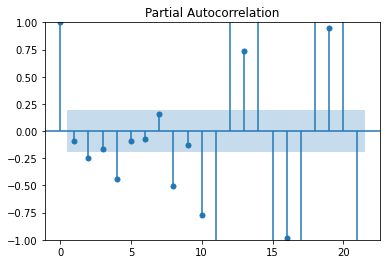

In [33]:
plot_pacf(df['first_difference'].dropna())

In [34]:
#  we consider the pacf plot as the best identification method for the p-value

In [36]:
# fitting the model

In [39]:
arima = ARIMA(df['sales'],order = (1,1,1))

C:\Users\Device Computer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [40]:
arima = arima.fit()

In [41]:
df['forecast']=arima.predict(start = 95,end = 120, dynamic = True)

<AxesSubplot:xlabel='month'>

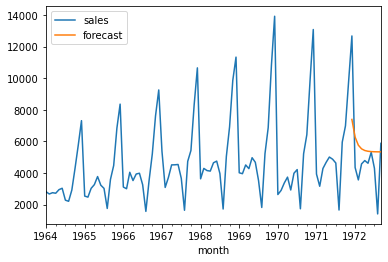

In [43]:
df[['sales','forecast']].plot()

In [44]:
#  as the above model is not taking seasonality into consideration using sarimax

In [46]:
sarimax = SARIMAX(df['sales'],order= (1,1,1),seasonal_order= (1,1,1,12))

C:\Users\Device Computer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [47]:
sarimax = sarimax.fit()

In [48]:
df['seasonal_forecast']=sarimax.predict(start = 95 ,end = 105 ,dynamic =True)

<AxesSubplot:xlabel='month'>

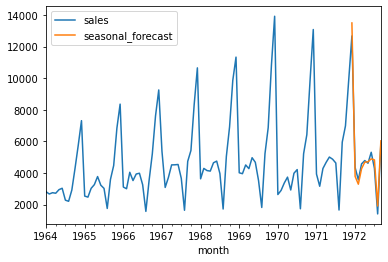

In [49]:
df[['sales','seasonal_forecast']].plot()

##  future predictions

In [58]:
df.index[-9]

Timestamp('1972-01-01 00:00:00')

In [67]:
future_days = [df.index[-9]+pd.tseries.offsets.DateOffset(month =x)for x  in range(13)]

In [69]:
future_days[10:]

[Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00')]

In [71]:
new_df = pd.DataFrame(index = future_days[10:],columns =df.columns)

In [72]:
new_df

,sales,first_difference,forecast,seasonal_forecast
1972-10-01,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN


In [73]:
new_df =  pd.concat([df,new_df])

In [75]:
new_df.tail()

,sales,first_difference,forecast,seasonal_forecast
1972-08-01,1413,2885.0,5339.988705,1911.734414
1972-09-01,5877,-4464.0,5337.950691,6037.406199
1972-10-01,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN


In [78]:
new_df['seasonal_forecast']=sarimax.predict(start = 105 ,end = 110 ,dynamic =True)

In [79]:
new_df.tail()

,sales,first_difference,forecast,seasonal_forecast
1972-08-01,1413,2885.0,5339.988705,NaN
1972-09-01,5877,-4464.0,5337.950691,NaN
1972-10-01,NaN,NaN,NaN,7023.698651
1972-11-01,NaN,NaN,NaN,9996.176128
1972-12-01,NaN,NaN,NaN,12891.999038
